In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pycountry
import geopandas


cost_df = pd.read_csv('./data/cost-of-living.csv', header=0)

print(cost_df.columns)
print(cost_df.shape)
cost_df.head()

#rename 'x54 column'
cost_df.rename(columns={'x54': 'Avg_monthly_salary(USD)'}, inplace=True)

#sort country and city alphabetically
cost_df.sort_values(by=['country', 'city'], ascending=True, inplace=True)

#set No. as index
cost_df.set_index('No.', inplace=True)

cost_df

Index(['No.', 'city', 'country', 'Meal', 'Meal_For_2', 'McDonalds_Meal',
       'Domestic_Beer_Rest(0.5L)', 'Imported_Beer_Rest(0.33L)', 'Cappuccino',
       'Coke/Pepsi', 'Water_Rest(0.33L)', 'Milk', 'Bread', 'Rice', 'Eggs',
       'Cheese', 'Chicken_Fillets', 'Beef', 'Apple', 'Bananas', 'Oranges',
       'Tomato', 'Potato', 'Onion', 'Lettuce', 'Water_Market(1.5L)',
       'Wine_Market', 'Domestic_Beer_Market(0.5L)',
       'Imported_Beer_Market(0.33L)', 'Cigarettes', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'data_quality'],
      dtype='object')
(4874, 59)


,city,country,Meal,Meal_For_2,McDonalds_Meal,Domestic_Beer_Rest(0.5L),Imported_Beer_Rest(0.33L),Cappuccino,Coke/Pepsi,Water_Rest(0.33L),...,x47,x48,x49,x50,x51,x52,x53,Avg_monthly_salary(USD),x55,data_quality
No.,,,,,,,,,,,,,,,,,,,,,
2743,Gardez,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
814,Herat,Afghanistan,1.67,6.11,2.78,2.22,NaN,0.56,0.39,0.11,...,19.45,61.12,38.89,111.13,77.79,461.58,238.47,150.02,10.30,0
1389,Jalalabad,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,88.90,NaN,NaN,NaN,NaN,NaN,NaN,9.40,0
129,Kabul,Afghanistan,1.67,5.56,3.06,NaN,NaN,0.92,0.22,0.13,...,35.56,107.12,63.90,238.93,144.47,683.44,350.05,192.62,13.88,1
916,Mazar-e Sharif,Afghanistan,1.67,7.73,2.96,NaN,NaN,0.44,0.34,0.15,...,NaN,66.68,33.34,111.13,55.56,277.82,111.13,222.26,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,Karoi,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2702,Masvingo,Zimbabwe,7.00,40.00,6.00,1.30,2.0,2.20,0.72,0.47,...,51.43,60.00,NaN,300.00,150.00,NaN,582.52,NaN,15.00,0
1746,Mutare,Zimbabwe,7.00,40.00,6.00,1.30,2.0,2.20,0.72,0.47,...,51.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00,0


/mnt/c/Users/Owner/Desktop/Data-engineer/Independent-Project/Cost-of-living/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/mnt/c/Users/Owner/Desktop/Data-engineer/Independent-Project/Cost-of-living/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


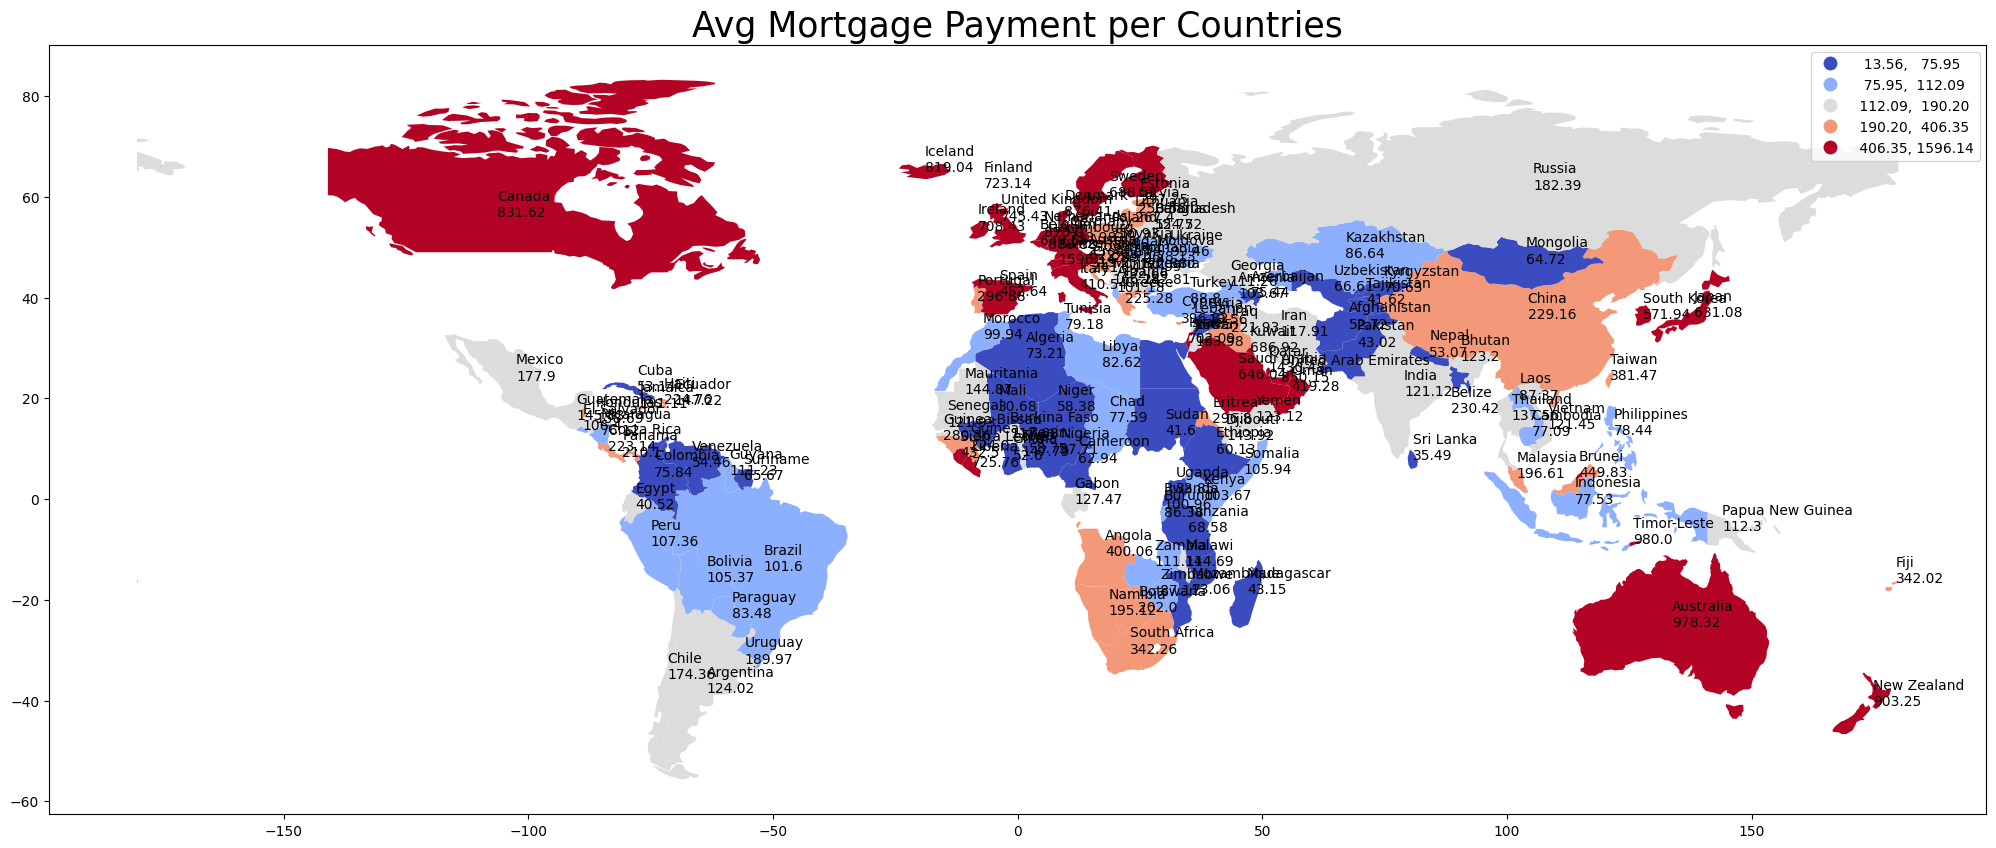

,index,pop_est,continent,country,CODE,gdp_md_est,geometry,Avg_monthly_salary(USD),Avg_mortgage_pmt,name,latitude,longitude
0,0,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",150.02,52.72,Afghanistan,33.939110,67.709953
1,1,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",257.39,101.18,Albania,41.153332,20.168331
2,2,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",259.98,73.21,Algeria,28.033886,1.659626
3,3,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",1428.77,400.06,Angola,-11.202692,17.873887
4,4,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",413.01,124.02,Argentina,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...
138,138,31304016,South America,Venezuela,VEN,468600.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...",200.00,54.46,Venezuela,6.423750,-66.589730
139,139,96160163,Asia,Vietnam,VNM,594900.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",245.81,121.45,Vietnam,14.058324,108.277199
140,140,28036829,Asia,Yemen,YEM,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",279.72,123.12,Yemen,15.552727,48.516388
141,141,15972000,Africa,Zambia,ZMB,65170.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",396.94,111.14,Zambia,-13.133897,27.849332


In [62]:
#create mortgage_df to drop Nan on 'Avg_monthly_salary(USD)'
mortgage_df = cost_df.dropna(subset=['Avg_monthly_salary(USD)'])

#calculate the 'Max_Mortgage_Pmt(USD)' based on 'Avg_monthly_salary(USD)'
mortgage_df['Max_Mortgage_Pmt(USD)'] = mortgage_df[['Avg_monthly_salary(USD)']].apply(lambda x: round((x*.28), 2))

#calculate 'Avg_mortgage_pmt' per country in general by
#add 'Avg_mortgage_pmt' column to mortgage_df
mortgage_df['Avg_mortgage_pmt'] = round(mortgage_df.groupby(by=['country'])[['Max_Mortgage_Pmt(USD)']].transform(np.mean), 2)

#drop all columns except: 
mortgage_df = mortgage_df[['country', 'Avg_monthly_salary(USD)', 'Avg_mortgage_pmt']]

#drop duplicates for country 
mortgage_df.drop_duplicates(subset='country', inplace=True)

# merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'country', 'CODE', 'gdp_md_est', 'geometry']

#sort country in world alphabetically
world.sort_values(by=['country'], ascending=True, inplace=True)

# then merge world with our data 
mortgage_df = pd.merge(world,mortgage_df,on='country')

# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
mortgage_df = mortgage_df.merge(location,left_on='country', right_on='name').reset_index()

# plot confirmed cases world map 
mortgage_df.plot(column='Avg_mortgage_pmt', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')

plt.title('Avg Mortgage Payment per Countries',fontsize=25)

# add countries names and numbers 
for i in range(0,143):
    plt.text(float(mortgage_df.longitude[i]),float(mortgage_df.latitude[i]),"{}\n{}".format(mortgage_df.name[i],mortgage_df.Avg_mortgage_pmt[i]),size=10)

plt.show()


mortgage_df

In [5]:
tech_salaries_df = pd.read_csv('./data/tech-salaries.csv', header=0)

print(tech_salaries_df.columns)
print(tech_salaries_df.shape)
tech_salaries_df.head()

#drop Nan value in 'annual_base_pay', 'job_title', 'location_country'
tech_salaries_df.dropna(subset=['annual_base_pay', 'job_title', 'location_country'], inplace=True) 

#calculate monthly mortgage payment per_country and job_title by: groupby()
#add result to main df by: transform()
tech_salaries_df['Payable_mortgage_per_job_per_month'] = round(tech_salaries_df.groupby(by=['location_country', 'job_title'])[['annual_base_pay']].transform(lambda x: (x/12)*.28), 2)

tech_salaries_df['location_country'].sort_values().unique()

# #read code.csv
# code_df = pd.read_csv('./data/codes.csv', header=0)

# #merge code and mortgage_df and drop lat and lon columns
# mortgage_code_df = mortgage_df.merge(code_df, on='country').drop(columns=['Latitude (average)', 'Longitude (average)'])

Index(['index', 'salary_id', 'employer_name', 'location_name',
       'location_state', 'location_country', 'location_latitude',
       'location_longitude', 'job_title', 'job_title_category',
       'job_title_rank', 'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus', 'stock_value_bonus',
       'comments', 'submitted_at'],
      dtype='object')
(1655, 19)


array(['AR', 'AU', 'BD', 'BE', 'BG', 'BM', 'BR', 'CA', 'CH', 'CN', 'CU',
       'CY', 'DE', 'DK', 'ES', 'FI', 'FR', 'GE', 'GR', 'HK', 'HU', 'IE',
       'IL', 'IN', 'IS', 'IT', 'JE', 'KE', 'LU', 'MA', 'MC', 'MD', 'MX',
       'NL', 'NO', 'NZ', 'OM', 'PE', 'PH', 'PK', 'PL', 'PR', 'PT', 'PY',
       'RS', 'RU', 'SE', 'SG', 'SI', 'TW', 'US', 'VE', 'VN', 'ZA'],
      dtype=object)